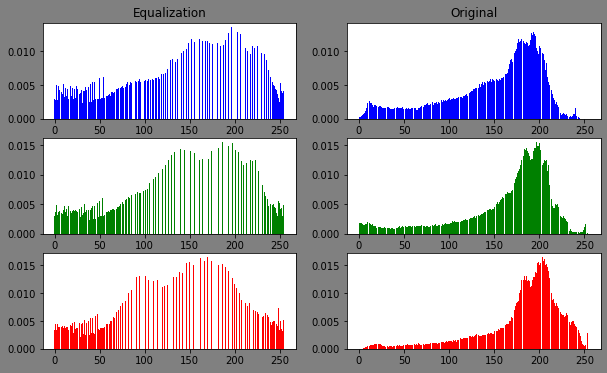

总用时 8.150013699999988 秒


In [1]:
#1读取图片并转成彩色图
#2计算每个像素值(0-255)的概率
#3 计算每个像素值(0-255)的累计概率
#4每一个累计概率乘以一个255得到一个新的像素值（总共有256个）
#5赋值，把新的像素值(总共有256个)赋值给对应的像素点
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
start=time.perf_counter()
img=cv2.imread('image1.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

count_b = np.zeros(256,np.float)
count_g = np.zeros(256,np.float)
count_r = np.zeros(256,np.float)
count_b=cv2.calcHist([img],[0],None,[256],[0,255])
count_g=cv2.calcHist([img],[1],None,[256],[0,255])
count_r=cv2.calcHist([img],[2],None,[256],[0,255])
for i in range(0,255):
    count_b[i] = count_b[i]/(height*width)
    count_g[i] = count_g[i]/(height*width)
    count_r[i] = count_r[i]/(height*width)
sum_b = float(0)
sum_g = float(0)
sum_r = float(0)
for i in range(0,256):
    sum_b = sum_b+count_b[i]
    sum_g = sum_g+count_g[i]
    sum_r = sum_r+count_r[i]
    count_b[i] = sum_b
    count_g[i] = sum_g
    count_r[i] = sum_r
map_b = np.zeros(256,np.uint16)
map_g = np.zeros(256,np.uint16)
map_r = np.zeros(256,np.uint16)
for i in range(0,256):#累计概率乘以一个255得到一个新的像素值
    map_b[i] = np.uint16(count_b[i]*255)
    map_g[i] = np.uint16(count_g[i]*255)
    map_r[i] = np.uint16(count_r[i]*255)
dst = np.zeros((height,width,3),np.uint8)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        # 赋值，把新的像素值(总共有256个)赋值给对应的像素点
        b = map_b[b]
        g = map_g[g]
        r = map_r[r]
        dst[i,j] = (b,g,r)

histb=cv2.calcHist([dst],[0],None,[256],[0,255])
histg=cv2.calcHist([dst],[1],None,[256],[0,255])
histr=cv2.calcHist([dst],[2],None,[256],[0,255])
histb=histb.reshape(256,)
histg=histg.reshape(256,)
histr=histr.reshape(256,)
for i in range(0,256):
    histb[i] = histb[i]/(height*width)
    histg[i] = histg[i]/(height*width)
    histr[i] = histr[i]/(height*width)  
x = np.linspace(0,255,256)
yb=histb
yg=histg
yr=histr
fig = plt.figure(figsize=(10,6),facecolor = 'gray')
ax1 = fig.add_subplot(3,2,1)
plt.bar(x,yb,0.9,alpha = 1 ,color = 'b')
plt.title('Equalization')
ax3 = fig.add_subplot(3,2,3)
plt.bar(x,yg,0.9,alpha = 1 ,color = 'g')
ax6 = fig.add_subplot(3,2,5)
plt.bar(x,yr,0.9,alpha = 1 ,color = 'r')
histb=cv2.calcHist([img],[0],None,[256],[0,255])
histg=cv2.calcHist([img],[1],None,[256],[0,255])
histr=cv2.calcHist([img],[2],None,[256],[0,255])
histb=histb.reshape(256,)
histg=histg.reshape(256,)
histr=histr.reshape(256,)
for i in range(0,256):
    histb[i] = histb[i]/(height*width)
    histg[i] = histg[i]/(height*width)
    histr[i] = histr[i]/(height*width)


yb_x=histb
yg_x=histg
yr_x=histr

ax2 = fig.add_subplot(3,2,2)
plt.bar(x,yb_x,0.9,alpha = 1 ,color = 'b')
plt.title('Original')

ax4 = fig.add_subplot(3,2,4)
plt.bar(x,yg_x,0.9,alpha = 1 ,color = 'g')
ax5 = fig.add_subplot(3,2,6)
plt.bar(x,yr_x,0.9,alpha = 1 ,color = 'r')
plt.show()

cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
end=time.perf_counter()
print('总用时',end-start,'秒')

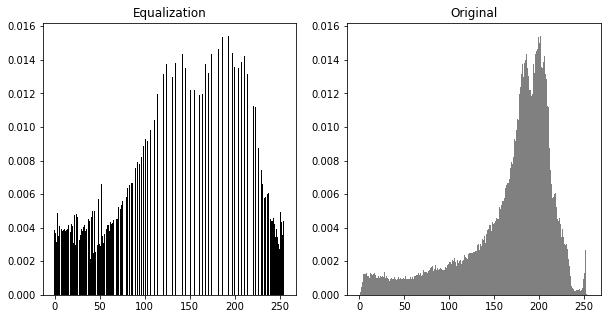

总用时 2.8162806000000273 秒


In [12]:
#灰度图
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
start=time.perf_counter()
img=cv2.imread('image1.jpg',0)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
count = np.zeros(256,np.float)
count=cv2.calcHist([img],[0],None,[256],[0,255])
for i in range(0,255):#概率
    count[i] = count[i]/(height*width)
sum =float(0)
for i in range(0,256):
    sum = sum+count[i]
    count[i] = sum
map = np.zeros(256,np.uint16)
for i in range(0,256):
    map[i] = count[i]*255


dst = np.zeros((height,width),np.uint8)
for i in range(0,height):
    for j in range(0,width):
        index = img[i,j]
        dst[i,j] = map[index]
fig = plt.figure(figsize=(10,5))
hist=cv2.calcHist([dst],[0],None,[256],[0.0,255.0])
hist=hist.reshape(256,)
for i in range(0,256):
    hist[i] = hist[i]/(height*width)
x = np.linspace(0,255,256)
y=hist
ax1 = fig.add_subplot(1,2,1)
plt.bar(x,y,0.9,alpha = 1 ,color = 'k')
plt.title('Equalization')

hist=cv2.calcHist([img],[0],None,[256],[0.0,255.0])
hist=hist.reshape(256,)
for i in range(0,256):
    hist[i] = hist[i]/(height*width)

x = np.linspace(0,255,256)
y=hist
ax2 = fig.add_subplot(1,2,2)
plt.bar(x,y,1,alpha = 1 ,color = 'gray')
plt.title('Original')
plt.show()
cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
end=time.perf_counter()
print('总用时',end-start,'秒')